In [1]:
!pip install ultralytics opencv-python matplotlib

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

zsh:1: /Users/keerthanaulaganathan/Desktop/python/ML/OpenCV/stock_env/bin/pip: bad interpreter: /Users/keerthanaulaganathan/Desktop/Python/ML/OpenCV/face_env/bin/python3.9: no such file or directory


In [2]:
yaml_text = """
path: /content/drive/MyDrive/SKU110K_subset
train: images/train
val: images/val
test: images/test

nc: 1
names: ["product"]
"""

with open("sku110k_subset.yaml", "w") as f:
    f.write(yaml_text)

print("✅ Correct YAML created at sku110k_subset.yaml")


✅ Correct YAML created at sku110k_subset.yaml



image 1/1 /Users/keerthanaulaganathan/Desktop/python/ML/OpenCV/stock_env/dataset/obi.jpeg: 512x640 (no detections), 47.3ms
Speed: 1.3ms preprocess, 47.3ms inference, 0.2ms postprocess per image at shape (1, 3, 512, 640)


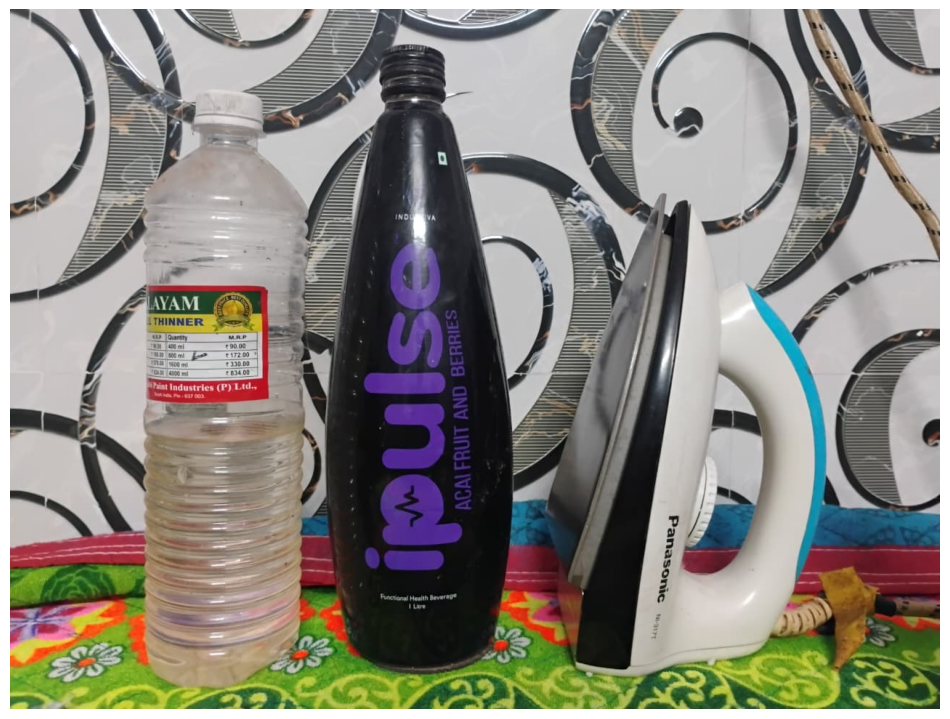

🛒 Detected Products: 0
⚠️ ALERT: Restock needed!


In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("/Users/keerthanaulaganathan/Desktop/python/ML/OpenCV/stock_env/yolo_runs/best.pt")

# Test on an image (replace with your path)
img_path = "/Users/keerthanaulaganathan/Desktop/python/ML/OpenCV/stock_env/dataset/obi.jpeg"
results = model(img_path)

# Show detections
output_img = results[0].plot()
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Count detected products
num_products = len(results[0].boxes)
print(f"🛒 Detected Products: {num_products}")

# Stock alert
threshold = 5
if num_products < threshold:
    print("⚠️ ALERT: Restock needed!")
else:
    print("✅ Stock level is sufficient")


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load your trained model
model = YOLO("/Users/keerthanaulaganathan/Desktop/python/ML/OpenCV/stock_env/yolo_runs/best.pt")  # update with your path

def detect_from_image(img_path):
    if not os.path.exists(img_path):
        print("⚠️ File not found.")
        return
    results = model(img_path)
    output_img = results[0].plot()

    # Show result
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    # Count products
    num_products = len(results[0].boxes)
    print(f"🛒 Detected Products: {num_products}")

    # Stock alert
    threshold = 5
    if num_products < threshold:
        print("⚠️ ALERT: Restock needed!")
    else:
        print("✅ Stock level is sufficient")


def detect_from_camera():
    cap = cv2.VideoCapture(0)  # 0 = default webcam
    threshold = 5

    if not cap.isOpened():
        print("⚠️ Could not access webcam.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame, conf=0.3, verbose=False)
        annotated = results[0].plot()
        num_products = len(results[0].boxes)

        # Add text overlay
        text = f"Products: {num_products}"
        color = (0, 255, 0) if num_products >= threshold else (0, 0, 255)
        if num_products < threshold:
            text += " ⚠️ Restock!"
        else:
            text += " ✅ OK"

        cv2.putText(annotated, text, (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

        cv2.imshow("Shelf Monitor", annotated)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cap.release()
    cv2.destroyAllWindows()


# -------- Main menu --------
while True:
    print("\n👉 Choose an option:")
    print("1. Upload an image for detection")
    print("2. Real-time camera monitoring")
    print("3. Exit")
    choice = input("Enter choice (1/2/3): ").strip()

    if choice == "1":
        path = input("Enter image file path: ").strip()
        detect_from_image(path)
    elif choice == "2":
        detect_from_camera()
    elif choice == "3":
        print("✅ Exiting program.")
        break
    else:
        print("⚠️ Invalid choice. Try again.")



👉 Choose an option:
1. Upload an image for detection
2. Real-time camera monitoring
3. Exit
